Bins: [-250.587      -245.75955556 -240.93211111 -236.10466667 -231.27722222
 -226.44977778 -221.62233333 -216.79488889 -211.96744444 -207.14
 -202.31255556 -197.48511111 -192.65766667 -187.83022222 -183.00277778
 -178.17533333 -173.34788889 -168.52044444 -163.693      -158.86555556
 -154.03811111 -149.21066667 -144.38322222 -139.55577778 -134.72833333
 -129.90088889 -125.07344444 -120.246      -115.41855556 -110.59111111
 -105.76366667 -100.93622222  -96.10877778  -91.28133333  -86.45388889
  -81.62644444  -76.799       -71.97155556  -67.14411111  -62.31666667
  -57.48922222  -52.66177778  -47.83433333  -43.00688889  -38.17944444
  -33.352       -28.52455556  -23.69711111  -18.86966667  -14.04222222
   -9.21477778   -4.38733333    0.44011111    5.26755556   10.095
   14.92244444   19.74988889   24.57733333   29.40477778   34.23222222
   39.05966667   43.88711111   48.71455556   53.542        58.36944444
   63.19688889   68.02433333   72.85177778   77.67922222   82.50666667
   87.33411

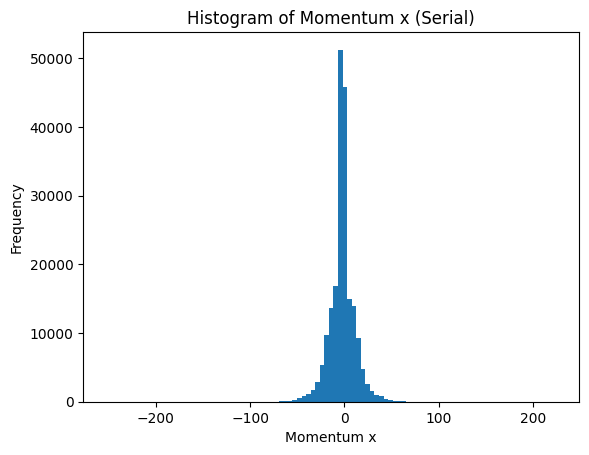

/home/isaac/Documents/introduction_to_hpc_workshop/env/lib/python3.12/site-packages/numba/core/typed_passes.py:336: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../../../../tmp/ipykernel_31315/819272716.py", line 45:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaPerformanceWarning(msg,


NotImplementedError: Implementar

In [1]:
"""
# Histogram
-----------

Un histograma es una representación gráfica de la distribución de un conjunto de datos. Para construirlo, los datos se agrupan en intervalos (`bins`) y se cuenta cuántos valores caen dentro de cada uno. En el gráfico resultante, el eje `x` representa los intervalos, mientras que el eje `y` indica la frecuencia de los datos en cada uno.

En este caso, los bins representan rangos de valores del momentum de una partícula. El momentum es una magnitud vectorial definida como el producto de la masa de un objeto por su velocidad. Se generará un histograma para la componente `x` del momentum de un conjunto de partículas registradas en 100,000 eventos del experimento CMS en el CERN (https://opendata.cern.ch/record/304).

Los histogramas son herramientas fundamentales en física de partículas para analizar y visualizar la distribución de los datos. Normalmente estos se crearían con herramientas especializadas como ROOT o directamente con `matplotlib`.

> https://en.wikipedia.org/wiki/Compact_Muon_Solenoid
"""

from numba import njit, prange
import matplotlib.pyplot as plt
import numpy as np
import time

INPUT_FILE = "assets/CERN_CMS_Events_with_two_electrons_from_2010.csv"
BIN_COUNT = 100

# Momentum in the x component of the first electron
momentum_x = np.genfromtxt(INPUT_FILE, delimiter=",", skip_header=1, usecols=3)
# Momentum in the x component of the second electron
momentum_x = np.concatenate(
    (momentum_x, np.genfromtxt(INPUT_FILE, delimiter=",", skip_header=1, usecols=11))
)

max_momentum_x = np.max(momentum_x)
min_momentum_x = np.min(momentum_x)

bins = np.linspace(min_momentum_x, max_momentum_x, BIN_COUNT)
print(f"Bins: {bins}")


def make_histogram_serial(momentum_x, bins):
    histogram = np.zeros(len(bins) - 1, dtype=np.int64)
    for i in range(len(momentum_x)):
        for j in range(len(bins) - 1):
            if bins[j] <= momentum_x[i] < bins[j + 1]:
                histogram[j] += 1
    return histogram


@njit(parallel=True)
def make_histogram_parallel(momentum_x, bins):
    raise NotImplementedError("Implementar")


print("Histogram")

serial_start = time.perf_counter()
histogram_serial = make_histogram_serial(momentum_x, bins)
serial_end = time.perf_counter()
print(f"Serial Time: {serial_end - serial_start:.6f}s")
plt.bar(bins[:-1], histogram_serial, width=bins[1] - bins[0])
plt.xlabel("Momentum x")
plt.ylabel("Frequency")
plt.title("Histogram of Momentum x (Serial)")
plt.show()

parallel_start = time.perf_counter()
histogram_parallel = make_histogram_parallel(momentum_x, bins)
parallel_end = time.perf_counter()
print(f"Parallel Time: {parallel_end - parallel_start:.6f}s")
plt.bar(bins[:-1], histogram_parallel, width=bins[1] - bins[0])
plt.xlabel("Momentum x")
plt.ylabel("Frequency")
plt.title("Histogram of Momentum x (Parallel)")
plt.show()